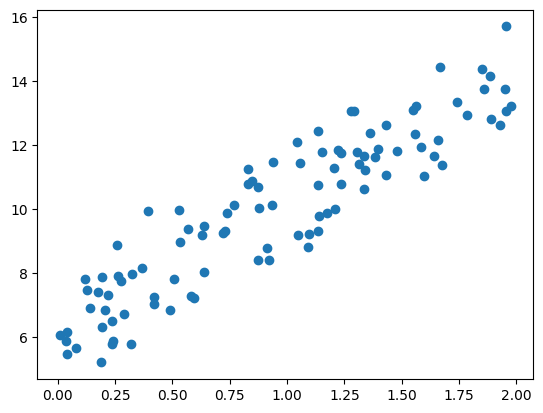

In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)
X = 2*np.random.rand(100,1)
y = 6 +4*X + np.random.randn(100,1)

plt.scatter(X,y)

In [10]:
# def get_weight_updates(w1, w0, X, y, learning_rate = 0.01):
#     N = len(y)
#     w1_update = np.zeros_like(w1)
#     w0_update = np.zeros_like(w0)
#     y_pred = np.dot(X, w1.T) + w0
#     diff = y - y_pred
#     w0_factors = np.ones((N,1))

#     w1_update = -(2/N)*learning_rate*(np.dot(X.T, diff))
#     w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T, diff))
#     return w1_update, w0_update
    

In [11]:
# def gradient_descent_steps(X, y, iters=10000):
#     w0 = np.zeros((1,1))
#     w1 = np.zeros((1,1))

#     for ind in range(iters):
#         w1_update, w0_update = get_weight_updates(w1,w0,X,y,learning_rate=0.01)
#         w1 = w1 - w1_update
#         w0 = w0 - w0_update

#         return w1, w0

In [12]:
# def get_cost(y, y_pred):
#     N = len(y)
#     cost = np.sum(np.square(y-y_pred))/N
#     return cost

# w1, w0 = gradient_descent_steps(X,y,iters=1000)
# print("w1:{0:.3f} w0:{1:.3f}".format(w1[0,0],w0[0,0]))
# y_pred = w1[0,0]*X + w0
# print('Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y,y_pred)))

w1:0.215 w0:0.199
Gradient Descent Total Cost:97.2970


In [17]:
def get_weight_updates(w1,w0,X,y, learning_late = 0.01):
    N=len(y)

    w1_update = np.zeros_like(w1) #초기값 0
    w0_update = np.zeros_like(w0)

    y_pred = np.dot(X,w1.T) + w0 # yhat = wx+b
    diff = y-y_pred #잔차

    w0_factors = np.ones((N,1))

    w1_update = - (2/N) * learning_late*(np.dot(X.T,diff))
    w0_update = -(2/N) * learning_late*(np.dot(w0_factors.T,diff))
    #learning_late = 에타값
    

    return w1_update, w0_update

In [18]:
def gradient_descent_steps(X,y, iters=1000):

    w0=np.zeros((1,1))
    w1=np.zeros((1,1))

    for ind in range(iters):
        w1_update, w0_update = get_weight_updates(w1,w0,X,y,learning_late=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update

    return w1, w0 

In [19]:
def get_cost(y, y_pred):
    N= len(y)
    cost = np.sum(np.square(y-y_pred))/N
    return cost

w1, w0 = gradient_descent_steps(X,y,iters=1000)

print(w1, w0)
y_pred = w1[0,0]*X +w0 
print(get_cost(y,y_pred))

[[4.02181364]] [[6.16203122]]
0.9934784315632568


In [33]:
def gradient_descent_steps_detail(X,y, iters=1000):

    w0=np.zeros((1,1))
    w1=np.zeros((1,1))

    for ind in range(iters):
        w1_update, w0_update = get_weight_updates(w1,w0,X,y,learning_late=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
        y_pred = np.dot(X,w1.T) + w0 # yhat = wx+b
        if ind % 10 == 0 :
            cost = get_cost(y, y_pred)
            print(cost)
            print(f'{ind}번째 mse : {cost} 이고  w1 : {w1} , w0 : {w0}' )
            print('==================================')

    return w1, w0 

In [ ]:
w1, w0 = gradient_descent_steps_detail(X,y, iters=10000)


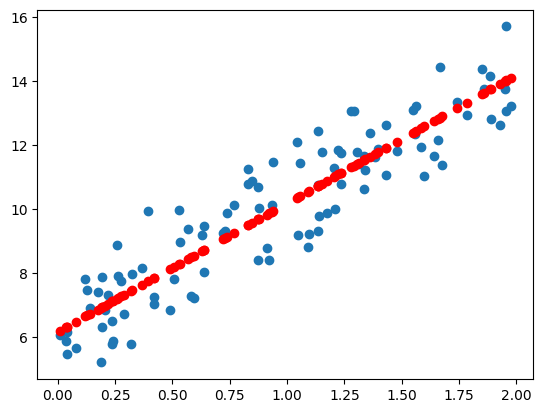

In [27]:
plt.scatter(X,y)
plt.scatter(X,y_pred, c='r')

In [ ]:
# def stochastic_gradient_descent_steps(X,y,batch_size=10, iters=1000):
#     w0 = np.zeros((1,1))
#     w1 = np.zeros((1,1))
#     prev_cost = 100000
#     iter_index = 0

#     for ind 

In [34]:
# 샘플링으로 데이터를 추출하여 시간 단축
def stochastic_gradient_descent_steps(X, y, batch_size = 10, iters = 1000):
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    prev_cost = 100000
    iter_index = 0

    for ind in range(iters):
        np.random.seed(ind)
        stochastic_random_index = np.random.permutation(X.shape[0])
        sample_X = X[stochastic_random_index[0:batch_size]]
        sample_y = y[stochastic_random_index[0:batch_size]]
        # 랜덤하게 batch_size만큼 추출된 데이터 기반으로 w1_update, w0_update 계산 후 업데이트
        w1_update, w0_update = get_weight_updates(w1, w0, sample_X, sample_y, learning_late = 0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
    return w1, w0

In [35]:
np.random.permutation(X.shape[0])

array([18, 29, 64, 92, 72, 87,  5, 15, 12, 17, 61, 76,  9, 78, 80,  7, 33,
        6, 37, 74, 79,  1, 45, 28, 60, 52, 25, 39, 97, 44, 16, 55, 83, 49,
       22, 70, 47,  4, 82, 94, 53, 66, 26, 84, 31, 63,  8, 75, 98, 57, 71,
       99, 86, 96, 69, 24, 30, 13, 40, 56, 68, 95, 81, 19, 38, 91, 54, 32,
       51, 85, 11, 89, 90, 36, 65, 88, 41, 14, 27, 50, 20, 46, 67, 35, 62,
        2, 59, 23, 58, 43, 10,  0, 73, 21, 77, 42,  3, 93, 48, 34])

In [36]:
w1, w0 = stochastic_gradient_descent_steps(X, y, iters= 10000)
print('w1: ', round(w1[0,0],3), 'w0:', round(w0[0,0],3))
y_pred = w1[0,0]*X + w0
print('Stochastic Gradient Descent Total Cost: {0: .4f}'.format(get_cost(y, y_pred)))

w1:  3.988 w0: 6.244
Stochastic Gradient Descent Total Cost:  0.9942


#### sklearn.linear_model.LinearRegression
* class sklearn.linear_model.LinearRegression(*, fit_intercept=True, copy_X=True, n_jobs=None, positive=False)

[67.30998637]


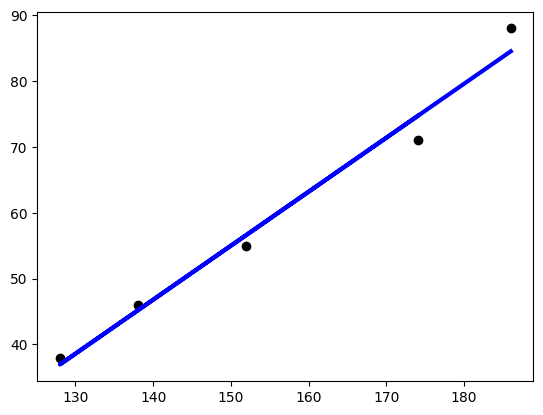

In [1]:
import matplotlib.pyplot as plt
from sklearn import linear_model

reg = linear_model.LinearRegression()

X = [174], [152], [138], [128], [186]
y = [71, 55,46, 38, 88]
reg.fit(X,y)

print(reg.predict([[165]]))

plt.scatter(X,y, color='black')

y_pred = reg.predict(X)

plt.plot(X,y_pred, color = 'blue', linewidth = 3)
plt.show()

In [2]:
# diabets regression

from sklearn.datasets import load_diabetes
load_diabetes()

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

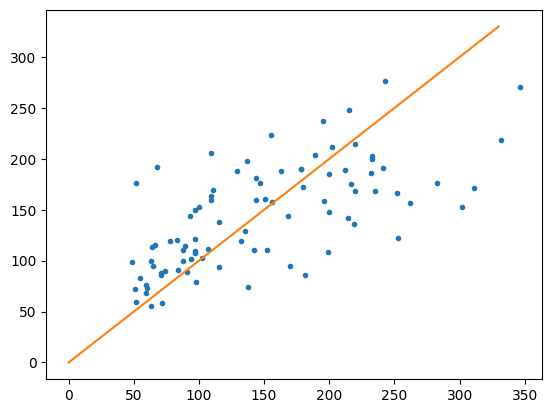

In [3]:
#당뇨 데이터 회귀 
import numpy as np 
from sklearn.datasets import load_diabetes
data=load_diabetes()
from sklearn.model_selection import train_test_split 
x_tr,x_test,y_tr,y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=1)

reg.fit(x_tr,y_tr)
y_pred = reg.predict(x_test)
plt.plot(y_test,y_pred,'.')

x=np.linspace(0,330,100)
y=x 
plt.plot(x,y)
plt.show()

In [6]:
from sklearn.metrics import mean_squared_error , r2_score

y_pred = reg.predict(x_test)
mean_squared_error(y_test, y_pred)

2992.5812293010163

In [7]:
r2_score(y_test, y_pred)

0.43843162133692803

In [8]:
# 성능 높이기 

from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(random_state=112)
rfr.fit(x_tr,y_tr)
rfr.feature_importances_

array([0.0569676 , 0.01277178, 0.32440987, 0.11758271, 0.04023184,
       0.04347454, 0.05230773, 0.02845814, 0.26359061, 0.06020519])

In [11]:
x_tr[: , [2, 3, 8]]

array([[-0.01590626, -0.06764174, -0.01811369],
       [ 0.00026092, -0.01141998,  0.02405509],
       [ 0.01211685,  0.04252949,  0.02539508],
       ...,
       [-0.03099563, -0.02288468, -0.09643495],
       [-0.01482845,  0.05860761, -0.00514219],
       [ 0.01103904, -0.05731319,  0.01703607]])

In [12]:
reg.fit(x_tr[: , [2, 3, 8]],y_tr)


LinearRegression()

In [13]:
y_pred = reg.predict(x_test[: , [2, 3, 8]])

In [14]:
mean_squared_error(y_test, y_pred)

3072.316722557313

In [15]:
r2_score(y_test, y_pred)

0.423468975968636

In [16]:
# 다중공선성
import pandas as pd

df = pd.DataFrame(data.data, columns=data.feature_names)
df['label'] = data.target

In [17]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,label
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [20]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

y, X = dmatrices('label ~age+ sex+bmi+bp+s1+s2+s3+s4+s5+s6', df, return_type = 'dataframe')
# X
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns 
vif

,VIF Factor,features
0,1.000000,Intercept
1,1.217307,age
2,1.278071,sex
3,1.509437,bmi
4,1.459428,bp
5,59.202510,s1
6,39.193370,s2
7,15.402156,s3
8,8.890986,s4
9,10.075967,s5


In [21]:
dfy, dfX = dmatrices('label ~age+ sex+bmi+bp +s3+s4+s5+s6', df, return_type = 'dataframe')

In [22]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(dfX.values, i) for i in range(dfX.shape[1])]
vif["features"] = dfX.columns 
vif

,VIF Factor,features
0,1.000000,Intercept
1,1.207546,age
2,1.274705,sex
3,1.486750,bmi
4,1.454393,bp
5,2.430240,s3
6,3.154782,s4
7,1.975611,s5
8,1.484007,s6


In [24]:
df_X = dfX.drop('Intercept' ,axis=1)

In [25]:
df_X.head()

,age,sex,bmi,bp,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.008142,-0.002592,-0.031988,-0.046641


In [26]:
x_tr,x_test,y_tr,y_test = train_test_split(df_X, data.target, test_size=0.2, random_state=1)

In [27]:
reg = linear_model.LinearRegression()
reg.fit(x_tr,y_tr)
y_pred = reg.predict(x_test)

from sklearn.metrics import mean_squared_error , r2_score

mean_squared_error(y_test, y_pred)

3095.083508472911

In [29]:
r2_score(y_test, y_pred)

0.4191967086267139

In [30]:
np.sqrt(mean_squared_error(y_test, y_pred))

55.63347471148024

In [31]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,label
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


#### Boston Housing Regression

In [1]:
import pandas as pd
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
boston_df = pd.read_csv('./datasets/boston_housing.csv' , header=None , delimiter=r"\s+" , names=column_names)
boston_df.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7


In [40]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [4]:
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

y_target = boston_df['MEDV']
x_data = boston_df.drop(['MEDV'],axis=1,inplace=False)
x_tr,x_test,y_tr,y_test = train_test_split(x_data, y_target, test_size=0.3, random_state=1)

lr= LinearRegression()
lr.fit(x_tr,y_tr)
y_pred=lr.predict(x_test)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

print(mse, r2)
print(lr.intercept_)
print(lr.coef_)

19.831323672063046 0.7836295385076302
46.39649387182381
[-9.85424717e-02  6.07841138e-02  5.91715401e-02  2.43955988e+00
 -2.14699650e+01  2.79581385e+00  3.57459778e-03 -1.51627218e+00
  3.07541745e-01 -1.12800166e-02 -1.00546640e+00  6.45018446e-03
 -5.68834539e-01]
